In [6]:
!brew install zbar

Error: 
  homebrew-core is a shallow clone.
To `brew update`, first run:
  git -C /usr/local/Homebrew/Library/Taps/homebrew/homebrew-core fetch --unshallow
This restriction has been made on GitHub's request because updating shallow
clones is an extremely expensive operation due to the tree layout and traffic of
Homebrew/homebrew-core and Homebrew/homebrew-cask. We don't do this for you
automatically to avoid repeatedly performing an expensive unshallow operation in
CI systems (which should instead be fixed to not use shallow clones). Sorry for
the inconvenience!
==> Downloading https://homebrew.bintray.com/bottles/ghostscript-9.53.3.big_sur.
==> Downloading from https://d29vzk4ow07wi7.cloudfront.net/e4257c3d71ed8777dca98
######################################################################## 100.0%
==> Downloading https://homebrew.bintray.com/bottles/libde265-1.0.8.big_sur.bott
==> Downloading from https://d29vzk4ow07wi7.cloudfront.net/6c809d037d6fe6c99a4c1
###########################

==> xmlcatalog --noout --add rewriteURI https://cdn.docbook.org/release/xsl/1.79
==> xmlcatalog --noout --del https://cdn.docbook.org/release/xsl/current /usr/lo
==> xmlcatalog --noout --add rewriteSystem https://cdn.docbook.org/release/xsl/c
==> xmlcatalog --noout --add rewriteURI https://cdn.docbook.org/release/xsl/curr
==> xmlcatalog --noout --del http://docbook.sourceforge.net/release/xsl-ns/1.79.
==> xmlcatalog --noout --add rewriteSystem http://docbook.sourceforge.net/releas
==> xmlcatalog --noout --add rewriteURI http://docbook.sourceforge.net/release/x
==> xmlcatalog --noout --del http://docbook.sourceforge.net/release/xsl-ns/curre
==> xmlcatalog --noout --add rewriteSystem http://docbook.sourceforge.net/releas
==> xmlcatalog --noout --add rewriteURI http://docbook.sourceforge.net/release/x
🍺  /usr/local/Cellar/docbook-xsl/1.79.2_1: 4,910 files, 94.0MB
==> Installing zbar dependency: gnu-getopt
==> Pouring gnu-getopt-2.36.1.big_sur.bottle.tar.gz
==> Caveats
gnu-getopt is keg-on

==> Pouring pango-1.48.0.big_sur.bottle.tar.gz
🍺  /usr/local/Cellar/pango/1.48.0: 64 files, 3MB
==> Installing graphviz dependency: librsvg
==> Pouring librsvg-2.50.2.big_sur.bottle.tar.gz
==> /usr/local/opt/gdk-pixbuf/bin/gdk-pixbuf-query-loaders --update-cache
🍺  /usr/local/Cellar/librsvg/2.50.2: 48 files, 141MB
==> Installing graphviz
==> Pouring graphviz-2.44.1.big_sur.bottle.1.tar.gz
🍺  /usr/local/Cellar/graphviz/2.44.1: 508 files, 19.2MB
Removing: /usr/local/Cellar/graphviz/2.40.1_1... (500 files, 11.2MB)
==> Upgrading netpbm 10.86.18 -> 10.86.18 
Removing: /usr/local/Cellar/netpbm/10.73.27... (741 files, 6.6MB)
==> Upgrading gts 0.7.6_2 -> 0.7.6_2 
Removing: /usr/local/Cellar/gts/0.7.6_1... (27 files, 1.1MB)
==> Checking for dependents of upgraded formulae...
==> No broken dependents found!
==> Caveats
==> docbook
To use the DocBook package in your XML toolchain,
you need to add the following to your ~/.bashrc:

export XML_CATALOG_FILES="/usr/local/etc/xml/catalog"
==> gnu-getop

In [8]:
!pip install pyzbar

You should consider upgrading via the '/Users/wangweizhong/Desktop/檔案管理/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
# import the necessary packages
from pyzbar import pyzbar
import cv2
# construct the argument parser and parse the arguments

In [30]:
# load the input image
image = cv2.imread('./1.jpg')
# find the barcodes in the image and decode each of the barcodes
barcodes = pyzbar.decode(image)

In [31]:
# loop over the detected barcodes
for barcode in barcodes:
	# extract the bounding box location of the barcode and draw the
	# bounding box surrounding the barcode on the image
	(x, y, w, h) = barcode.rect
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
	# the barcode data is a bytes object so if we want to draw it on
	# our output image we need to convert it to a string first
	barcodeData = barcode.data.decode("utf-8")
	barcodeType = barcode.type
	# draw the barcode data and barcode type on the image
	text = "{} ({})".format(barcodeData, barcodeType)
# 	cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
# 		0.5, (0, 0, 255), 2)
	# print the barcode type and data to the terminal
	print(" {} barcode: {}".format(barcodeType, barcodeData))
# show the output image
cv2.imwrite("Image.jpg", image)

 QRCODE barcode: SMSTO:1922:場所代碼：2363 0508 8881 590
本次簡訊實聯限防疫目的使用。


True

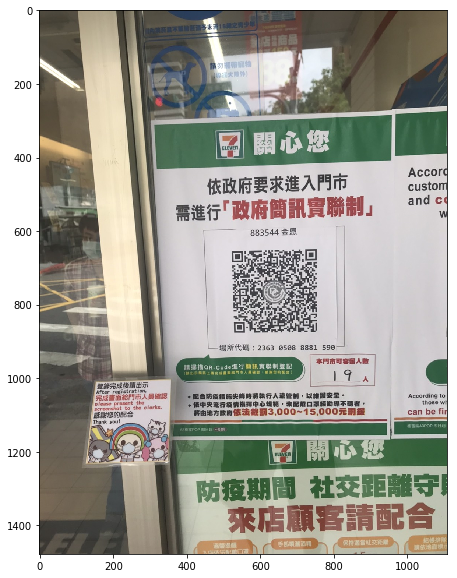

In [14]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

def show(img, code=cv2.COLOR_BGR2RGB):
    cv_rgb = cv2.cvtColor(img, code)
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.imshow(cv_rgb)
    fig.show()

img = cv2.imread('test.jpg')
show(img)

In [15]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [16]:
edges = cv2.Canny(img_gray, 100 , 200)

True

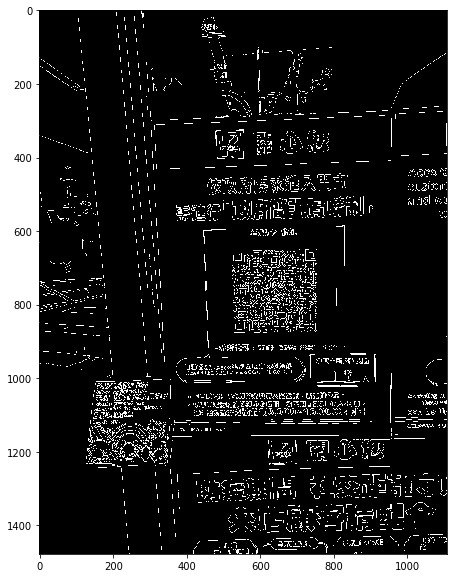

In [19]:
show(edges)
cv2.imwrite('edges.jpg', edges)

In [20]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hierarchy = hierarchy[0]
found = []
for i in range(len(contours)):
    k = i
    c = 0
    while hierarchy[k][2] != -1:
        k = hierarchy[k][2]
        c = c + 1
    if c >= 5:
        found.append(i)

img_dc = img.copy()
for i in found:
    cv2.drawContours(img_dc, contours, i, (0, 255, 0), 3)
cv2.imwrite('three_points.jpg',img_dc)

3


True

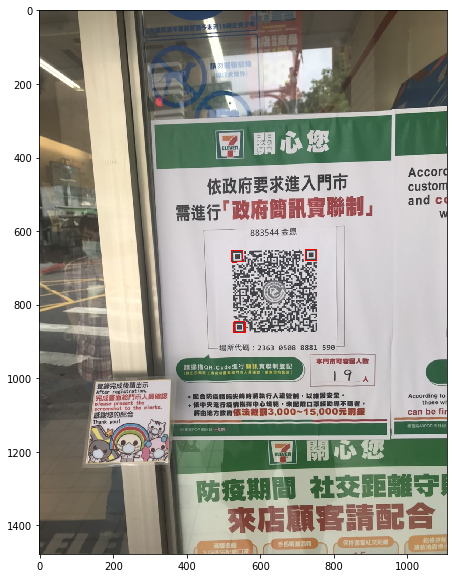

In [21]:
draw_img = img.copy()
for i in found:
    rect = cv2.minAreaRect(contours[i])
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(draw_img,[box], 0, (0,0,255), 2)
show(draw_img)